In [47]:
import seaborn as sns

In [48]:
from cProfile import label


class Dados:
    def __init__(self, label, file_output, file_memory):
        
        self.label =  label
        self.acumulador_acuracia = []
        self.acumulador_chucks = []
        self.file_name_output = "output/"+file_output
        self.file_name_memory = "memory/"+file_output
        self.acuracia = 0
    

    def run(self):
        self.acumulador_acuracia = []
        
        file = open(self.file_name_output,"r")

        ## acuracia 1
        dados = file.readlines()
        file.close()
        true_function = lambda x: list(map(int,x[:-1].split(',')))[1]
        y_true= list(map(true_function,dados))

        predict_function = lambda x: list(map(int, x[:-1].split(',')))[0]
        y_pred = list(map(predict_function,dados))
        self.acuracia = 0
        for indice, (v_true, v_pred) in enumerate(zip(y_true, y_pred)):
            booleano = 0
            if v_true == v_pred:
                booleano = 1

            self.acuracia = (self.acuracia* indice + booleano)/(indice+1)
            self.acumulador_acuracia.append(self.acuracia)

        ## acuracia 2
        self.acumulador_chucks = [] 
        somador = 0
        ultimo_valor = None
        for indice, (v_true, v_pred) in enumerate(zip(y_true, y_pred)):
            if v_true  == v_pred:
                somador+=1
            
            if indice % 2000 == 1999:
                ultimo_valor = somador/2000
                # acumulador.append(somador/ 1000)
                somador = 0 
            self.acumulador_chucks.append(ultimo_valor)
        self.acumulador_chucks.append(  somador / (len(y_true)%2000 -1  ))


        
        file = open(self.file_name_memory,"r")
        self.valor = []
        for line in file.readlines():
            # print(line.split)
            self.valor.append(int(line.split(",")[-1][:-1]))

        file.close()

    def acuracia_acumulada_grafico(self):
        import matplotlib.pyplot as plt
        plt.ylim(0,1)
        sns.lineplot( x= range(0, len(self.acumulador_acuracia)) , y = self.acumulador_acuracia, label=str(self.label))

    def acuracia_chuck_grafico(self):
        import matplotlib.pyplot as plt
        plt.ylim(0,1)
        sns.lineplot(x = range(0, len(self.acumulador_chucks[:-1])) , y = self.acumulador_chucks[:-1], label=str(self.label))

    def memory_grafico(self):
        sns.lineplot(x = range(0, len(self.valor)), y = self.valor,  label=str(self.label))

In [49]:
objetos= []
objetos.append( Dados("Cenário 1", "cenario_1.csv", "cenario_1.csv"))
objetos.append( Dados("Cenário 2", "cenario_2.csv", "cenario_2.csv"))
objetos.append( Dados("Cenário 3", "cenario_3.csv", "cenario_3.csv"))
objetos.append( Dados("Cenário 4", "cenario_4.csv", "cenario_4.csv"))

objetos.append( Dados("Cenário 5", "cenario_5.csv", "cenario_5.csv"))

# objetos.append( Dados("Cenário 6", "cenario_6.csv", "cenario_6.csv"))



In [50]:

for i in objetos:
    i.run()

# open("memory/memory_output.csv")

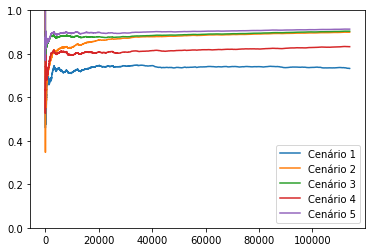

In [51]:
for i in objetos:
    i.acuracia_acumulada_grafico()

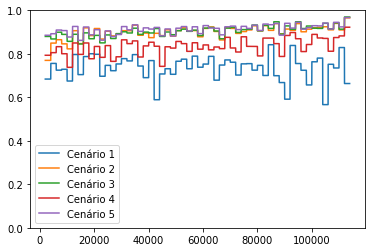

In [52]:
for i in objetos:
    i.acuracia_chuck_grafico()

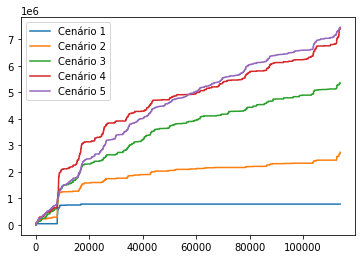

In [53]:

for i in objetos:
    i.memory_grafico()

In [77]:
import numpy as np
for i in objetos:
    print("{:.5f}".format( 1.96 * np.std(i.acumulador_chucks[2000:])  ))
    

0.10970
0.06097
0.04757
0.07431
0.04161
